# Instacart Shopper Experiment

###
### Context
In this simulated dataset, we have been running an A/B test on our shopper hiring funnel to see if initiating the required applicant background check earlier in the process would improve conversion rates. The theory is that shoppers will maintain their momentum and be more likely to start (and start more quickly) if the required pre-requisites are completed faster.

The background check costs us $30 to complete. A shopper must both activate the prepaid debit card we mail to them (to use when paying for groceries purchased for our customers) and have successfully passed their background check to complete their first batch of orders. Completing the online orientation, however, is optional.

In this scenario, “success” for our shopper recruiting funnel is achieved if they complete their first batch (see “first_batch_completed_date”)

# Data exploratory

In [82]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings

warnings.filterwarnings('ignore')

In [83]:
# read file
df = pd.read_csv('application.csv')

# check dataset
df.head(20)

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01
1,10002,social-media,control,Midgard,application_date,2018-10-01
2,10003,web-search-engine,treatment,Midgard,application_date,2018-10-01
3,10004,social-media,treatment,Asgard,application_date,2018-10-01
4,10005,social-media,treatment,Midgard,application_date,2018-10-01
5,10006,job-search-site,control,Asgard,application_date,2018-10-01
6,10007,social-media,control,Midgard,application_date,2018-10-01
7,10008,web-search-engine,control,Asgard,application_date,2018-10-01
8,10009,social-media,control,Helheim,application_date,2018-10-01
9,10010,job-search-site,control,Asgard,application_date,2018-10-01


In [84]:
# get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108328 entries, 0 to 108327
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   applicant_id  108328 non-null  int64 
 1   channel       108328 non-null  object
 2   group         108328 non-null  object
 3   city          108328 non-null  object
 4   event         108328 non-null  object
 5   event_date    108328 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.0+ MB


In [85]:
# change data type, to unify the data type
df['applicant_id'] = df['applicant_id'].astype('object')
df['event_date'] = df['event_date'].astype('datetime64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108328 entries, 0 to 108327
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   applicant_id  108328 non-null  object        
 1   channel       108328 non-null  object        
 2   group         108328 non-null  object        
 3   city          108328 non-null  object        
 4   event         108328 non-null  object        
 5   event_date    108328 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 5.0+ MB


In [86]:
df

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01
1,10002,social-media,control,Midgard,application_date,2018-10-01
2,10003,web-search-engine,treatment,Midgard,application_date,2018-10-01
3,10004,social-media,treatment,Asgard,application_date,2018-10-01
4,10005,social-media,treatment,Midgard,application_date,2018-10-01
...,...,...,...,...,...,...
108323,29128,web-search-engine,treatment,Asgard,first_batch_completed_date,2018-11-11
108324,29161,web-search-engine,treatment,Vanaheim,first_batch_completed_date,2018-11-10
108325,29167,shopper-referral-bonus,treatment,Jotunheim,first_batch_completed_date,2018-11-11
108326,29170,shopper-referral-bonus,treatment,Alfheim,first_batch_completed_date,2018-11-11


In [87]:
# explore dataset
df.describe()

,applicant_id,channel,group,city,event,event_date
count,108328.0,108328,108328,108328,108328,108328
unique,21698.0,4,2,9,7,42
top,13575.0,web-search-engine,control,Midgard,application_date,2018-11-11 00:00:00
freq,7.0,41632,68750,49648,21698,3625
first,NaN,NaN,NaN,NaN,NaN,2018-10-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-11-11 00:00:00


In [88]:
# check unique sample size

# df.groupby('group').applicant_id.nunique()  # return series

df.groupby('group').agg({'applicant_id': 'nunique'})  # return df

# The sample size of treatment group is 7197, and the sample size of control group is 14501, which is not an abvious 50/50 split.

,applicant_id
group,
control,14501
treatment,7197


In [89]:
# check event size

# df.groupby('group').applicant_id.count()
df.groupby('group').agg({'applicant_id': 'count'})  # return df

,applicant_id
group,
control,68750
treatment,39578


In [90]:
# check converstion funnel and its sequence by group

df_control_converstion = df[df['group'] == 'control'].groupby(['group',
                                                               'event']).applicant_id.nunique().sort_values(
    ascending=False)

df_control_converstion = df_control_converstion.to_frame()
# change the pd.series to pd.dataframe

df_control_converstion

applicant_id
group   event                                        
control application_date                        14501
        card_mailed_date                        14266
        background_check_initiated_date         10836
        card_activation_date                    10836
        background_check_completed_date          9456
        orientation_completed_date               5982
        first_batch_completed_date               2873

In [91]:
# check converstion funnel and its sequence by group

df_treatment_converstion = df[df['group'] == 'treatment'].groupby(['group',
                                                                   'event']).applicant_id.nunique().sort_values(
    ascending=False)

df_treatment_converstion = df_treatment_converstion.to_frame()
# change the pd.series to pd.dataframe

df_treatment_converstion

applicant_id
group     event                                        
treatment application_date                         7197
          background_check_initiated_date          7197
          card_mailed_date                         7071
          background_check_completed_date          6384
          card_activation_date                     5889
          orientation_completed_date               3369
          first_batch_completed_date               2471

### Plot the converstion funnel of both groups

In [92]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y=df_control_converstion.index.get_level_values(1),
    x=df_control_converstion.applicant_id,
    name='control',
    textinfo="value+percent initial"))

fig.show()

# The converstion funnel of control group is: application_date -> orientation_completed_date -> first_batch_completed_date

# and the converstion rate is about 20%

In [93]:
# plot the converstion funnel of treatment group

df_treat_converstion = df[df['group'] == 'treatment'].groupby(['group', 'event']).applicant_id.nunique().sort_values(
    ascending=False)

# print(df_treat_converstion)

df_treat_converstion = df_treat_converstion.to_frame()

fig = go.Figure(go.Funnel(
    y=df_treat_converstion.index.get_level_values(1),
    x=df_treat_converstion.applicant_id,
    name='treatment',
    textinfo="value+percent initial",
    marker=dict(color='rgb(165,0,38)')))

fig.show()

# from the funnel chart, we can see that the converstion rate of treatment group is higher than control group, reaching to about 43%

In [94]:
# Let's combine the converstion funnel of both groups

fig = go.Figure(go.Funnel(
    y=df_control_converstion.index.get_level_values(1),
    x=df_control_converstion.applicant_id,
    name='control',
    textinfo="value+percent initial"))

fig.add_funnel(
    y=df_treat_converstion.index.get_level_values(1),
    x=df_treat_converstion.applicant_id,
    name='treatment',
    textinfo="value+percent initial")

fig.show()

# Due to the different sample size of both groups, we can't compare the converstion rate directly, but we can compare the converstion rate of each step.

# and for the last and final conversion rate, the treatment group is higher than control group, which means the treatment group has a higher converstion rate than control group. And the data is 43% vs 27%, which is a big difference.

In [95]:
df_concat = pd.concat([df_control_converstion, df_treat_converstion], )
df_concat = df_concat.reset_index()
df_concat

,group,event,applicant_id
0,control,application_date,14501
1,control,card_mailed_date,14266
2,control,background_check_initiated_date,10836
3,control,card_activation_date,10836
4,control,background_check_completed_date,9456
5,control,orientation_completed_date,5982
6,control,first_batch_completed_date,2873
7,treatment,application_date,7197
8,treatment,background_check_initiated_date,7197
9,treatment,card_mailed_date,7071


### Explore the converstion rate of each step and the duration of each step

In [96]:
# check experiment duration

print(df['event_date'].min())
print(df['event_date'].max())

print(df['event_date'].max() - df['event_date'].min())

# the experiment lasted for a month, from 2018-10-01 to 2018-11-11
# and the experiment lasted for 41 days

2018-10-01 00:00:00
2018-11-11 00:00:00
41 days 00:00:00


In [97]:
# transpose the dataset by group and applicant_id to check the duration of each step

df_transpose = df.pivot_table(index=['group', 'applicant_id'],
                              columns='event',
                              values='event_date',
                              aggfunc='max')

# df_transpose.reset_index()
df_transpose

event                  application_date background_check_completed_date  \
group     applicant_id                                                    
control   10001              2018-10-01                             NaT   
          10002              2018-10-01                      2018-10-17   
          10006              2018-10-01                             NaT   
          10007              2018-10-01                      2018-10-11   
          10008              2018-10-01                             NaT   
...                                 ...                             ...   
treatment 31684              2018-11-11                             NaT   
          31686              2018-11-11                             NaT   
          31687              2018-11-11                             NaT   
          31689              2018-11-11                             NaT   
          31691              2018-11-11                             NaT   

event                  background_check_initiated_date card_activation_date  \
group     applicant_id                                                        
control   10001                                    NaT                  NaT   
          10002                             2018-10-12           2018-10-12   
          10006                                    NaT                  NaT   
          10007                             2018-10-07           2018-10-07   
          10008                                    NaT                  NaT   
...                                                ...                  ...   
treatment 31684                             2018-11-11                  NaT   
          31686                             2018-11-11                  NaT   
          31687                             2018-11-11                  NaT   
          31689                             2018-11-11                  NaT   
          31691                             2018-11-11                  NaT   

event                  card_mailed_date first_batch_completed_date  \
group     applicant_id                                               
control   10001              2018-10-01                        NaT   
          10002              2018-10-01                 2018-10-20   
          10006              2018-10-01                        NaT   
          10007              2018-10-02                 2018-10-14   
          10008              2018-10-02                        NaT   
...                                 ...                        ...   
treatment 31684              2018-11-11                        NaT   
          31686              2018-11-11                        NaT   
          31687              2018-11-11                        NaT   
          31689              2018-11-11                        NaT   
          31691                     NaT                        NaT   

event                  orientation_completed_date  
group     applicant_id                             
control   10001                        2018-10-03  
          10002                               NaT  
          10006                               NaT  
          10007                               NaT  
          10008                               NaT  
...                                           ...  
treatment 31684                               NaT  
          31686                               NaT  
          31687                               NaT  
          31689                               NaT  
          31691                               NaT  

[21698 rows x 7 columns]

In [98]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [99]:
df_transpose = df_transpose.reset_index()
df_transpose

event,group,applicant_id,application_date,background_check_completed_date,background_check_initiated_date,card_activation_date,card_mailed_date,first_batch_completed_date,orientation_completed_date
0,control,10001,2018-10-01,NaT,NaT,NaT,2018-10-01,NaT,2018-10-03
1,control,10002,2018-10-01,2018-10-17,2018-10-12,2018-10-12,2018-10-01,2018-10-20,NaT
2,control,10006,2018-10-01,NaT,NaT,NaT,2018-10-01,NaT,NaT
3,control,10007,2018-10-01,2018-10-11,2018-10-07,2018-10-07,2018-10-02,2018-10-14,NaT
4,control,10008,2018-10-01,NaT,NaT,NaT,2018-10-02,NaT,NaT
...,...,...,...,...,...,...,...,...,...
21693,treatment,31684,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT
21694,treatment,31686,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT
21695,treatment,31687,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT
21696,treatment,31689,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT


### Plot the duration time

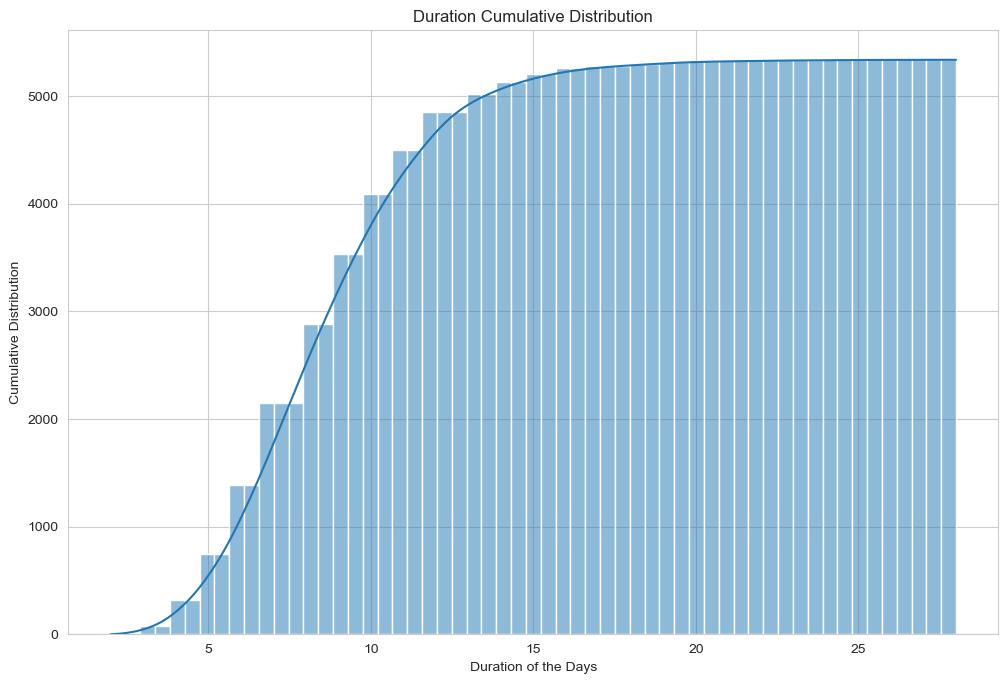

In [100]:
# What's the distribution of the duration of the days between application_date to first_batch_completed_date

plt.figure(figsize=(12, 8), dpi=100)
duration = (df_transpose['first_batch_completed_date'] - df_transpose['application_date'])

sns.histplot(duration[duration.notna()].dt.days,
             kde=True,
             cumulative=True
             )

plt.xlabel('Duration of the Days')
plt.ylabel('Cumulative Distribution')
plt.title('Duration Cumulative Distribution')

plt.show()

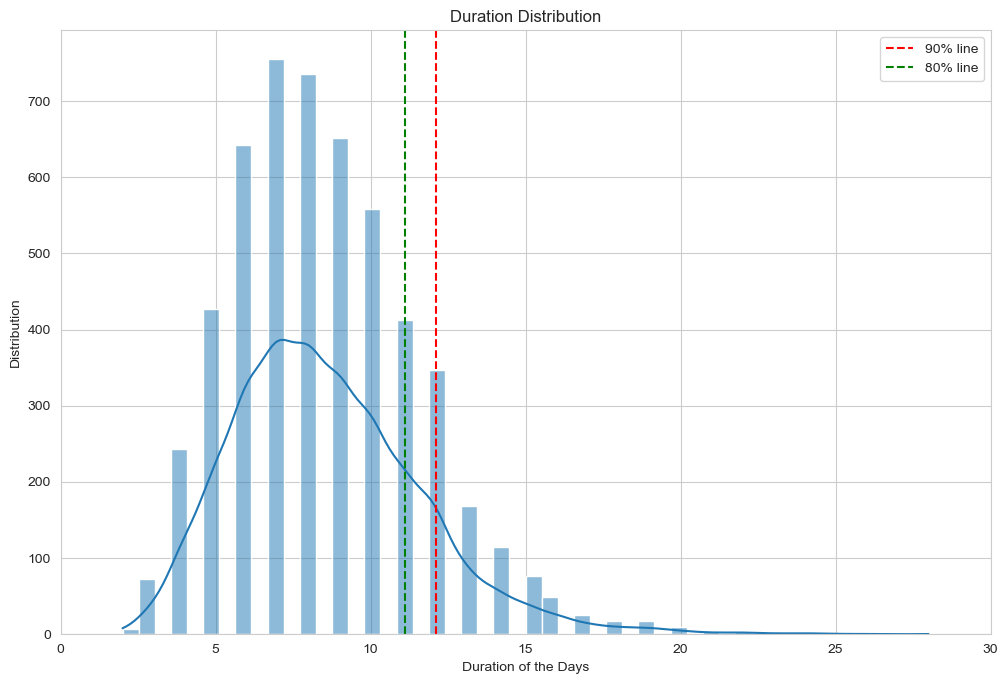

In [101]:
# Plot the duration histogram

plt.figure(figsize=(12, 8), dpi=100)
sns.histplot(duration[duration.notna()].dt.days,
             kde=True,
             cumulative=False,
             bins=50
             )

# add a 90% line and 80% line

plt.axvline(
    x=duration[duration.notna()].dt.days.quantile(0.9) + 0.1,
    color='red',
    linestyle='--',
    label='90% line'
)

plt.axvline(
    x=duration[duration.notna()].dt.days.quantile(0.8) + 0.1,
    color='green',
    linestyle='--',
    label='80% line'
)

plt.legend(loc='upper right')

plt.xlim(0, 30)

plt.xlabel('Duration of the Days')
plt.ylabel('Distribution')
plt.title('Duration Distribution')

plt.show()

In [102]:
# Plot the duration histogram of control group
duration_control = (df_transpose[df_transpose.group == 'control']['first_batch_completed_date'] -
                    df_transpose[df_transpose.group == 'control']['application_date'])

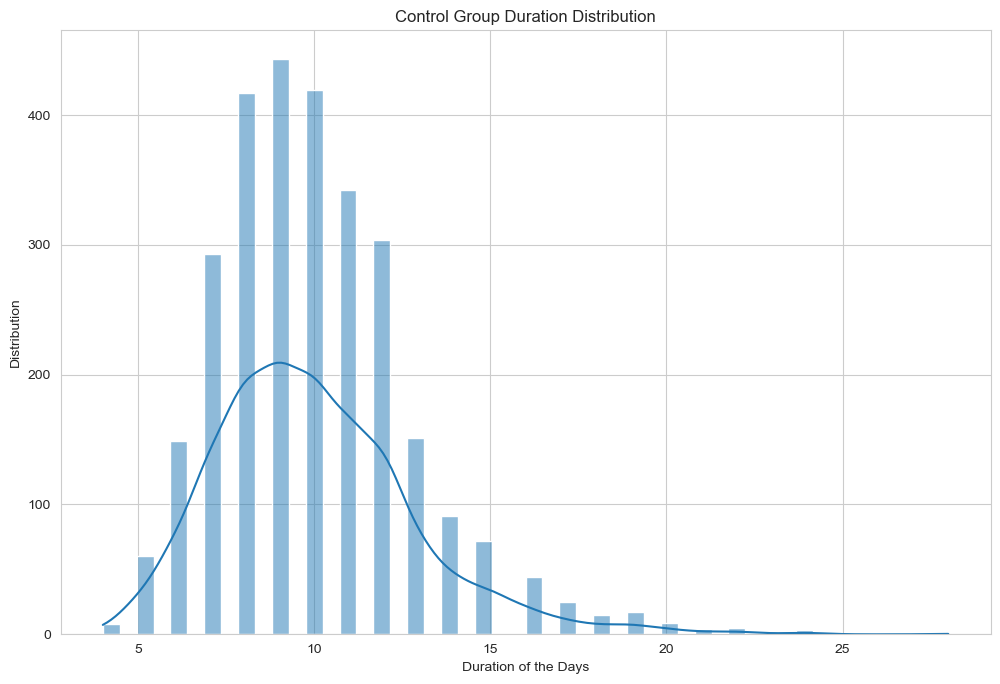

In [103]:
plt.figure(figsize=(12, 8), dpi=100)

sns.histplot(duration_control[duration_control.notna()].dt.days,
             kde=True,
             cumulative=False,
             bins=50
             )

plt.xlabel('Duration of the Days')
plt.ylabel('Distribution')
plt.title('Control Group Duration Distribution')

plt.show()

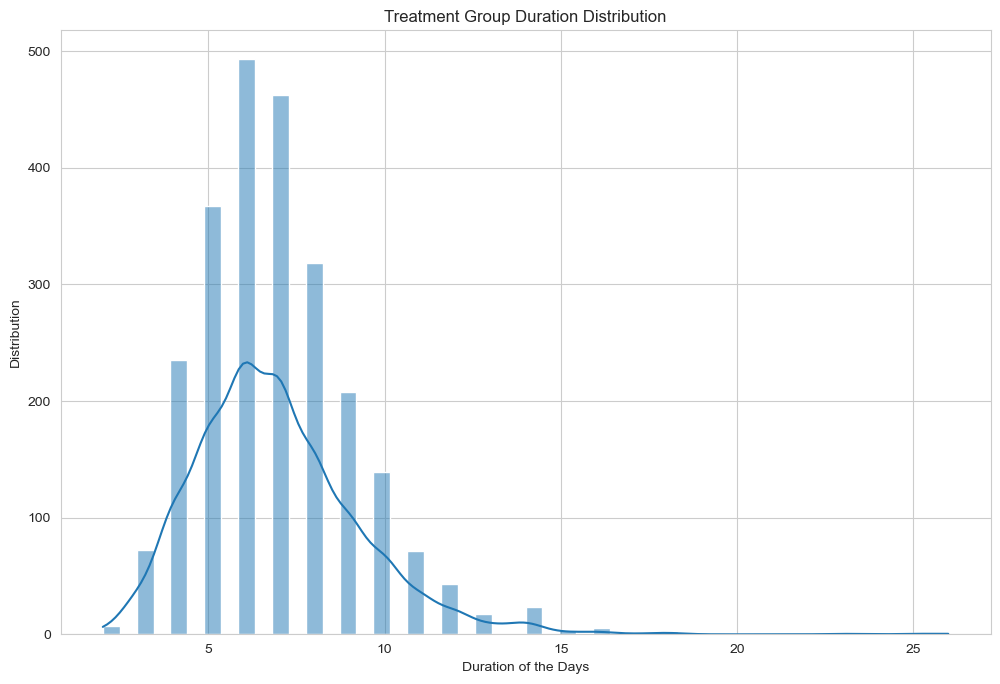

In [104]:
plt.figure(figsize=(12, 8), dpi=100)
duration_treatment = (df_transpose[df_transpose.group == 'treatment']['first_batch_completed_date'] -
                      df_transpose[df_transpose.group == 'treatment']['application_date'])

sns.histplot(duration_treatment[duration_treatment.notna()].dt.days,
             kde=True,
             cumulative=False,
             bins=50
             )

plt.xlabel('Duration of the Days')
plt.ylabel('Distribution')
plt.title('Treatment Group Duration Distribution')

plt.show()


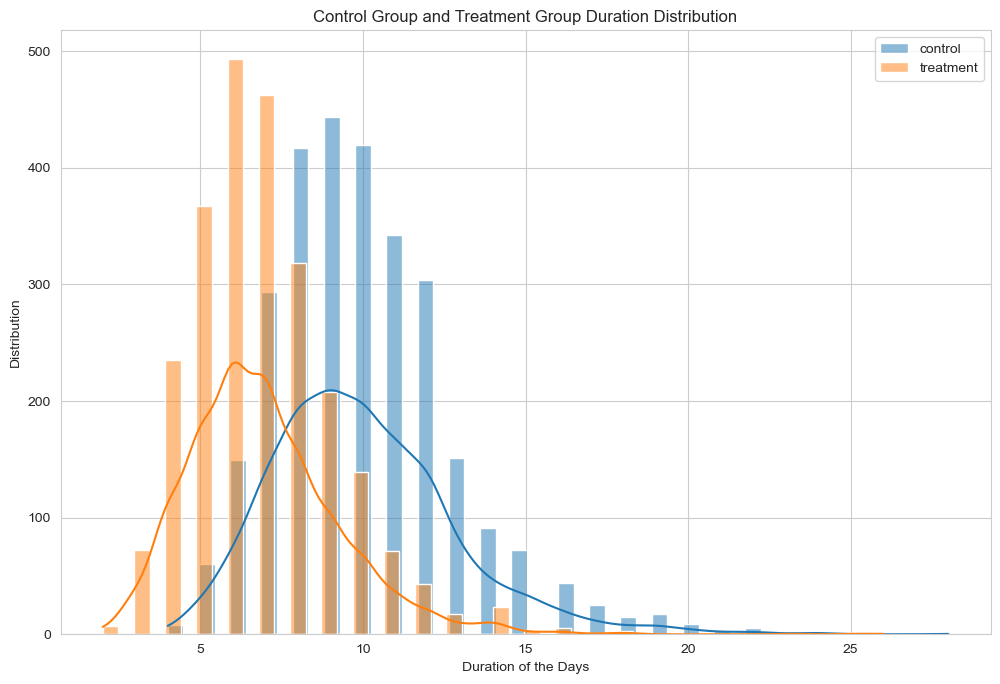

In [105]:
# Plot the duration histogram of control group and treatment group

plt.figure(figsize=(12, 8), dpi=100)

sns.histplot(duration_control[duration_control.notna()].dt.days,
             kde=True,
             cumulative=False,
             bins=50,
             label='control'
             )

sns.histplot(duration_treatment[duration_treatment.notna()].dt.days,
             kde=True,
             cumulative=False,
             bins=50,
             label='treatment'
             )

plt.xlabel('Duration of the Days')
plt.ylabel('Distribution')
plt.title('Control Group and Treatment Group Duration Distribution')

plt.legend()

plt.show()

# from the duration distribution, we can see that the duration of treatment group is shorter than control group, which means the treatment group has a higher converstion rate than control group.

## Population

In [106]:
# Defind the conversion windows

# The whole process is from application_date -> first_batch_completed_date
# and we define the application date range from [2018-10-01 00:00:00, 2018-10-31 00:00:00]
# because the 80% -> duration 11 days, so we can define the conversion window as 11 days

qualified_applicant_id = pd.DataFrame(df.loc[(df['event'] == 'application_date')
                                             & (df['event_date'] <= '2018-10-31'), 'applicant_id'].unique())

qualified_applicant_id.columns = ['qualified_applicant_id']

# we pick the applicant_id who applied before 2018-10-31

In [107]:
qualified_applicant_id.head()

,qualified_applicant_id
0,10001
1,10002
2,10003
3,10004
4,10005


In [108]:
qualified_applicant_id.shape[0]

# There are 14982 qualified applicant_id

14982

In [109]:
# filter out who are not qualified in this experiment


df = df.merge(qualified_applicant_id, left_on='applicant_id', right_on='qualified_applicant_id',
              how='inner').reset_index(drop=True)

df.head()

,applicant_id,channel,group,city,event,event_date,qualified_applicant_id
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01,10001
1,10001,web-search-engine,control,Asgard,card_mailed_date,2018-10-01,10001
2,10001,web-search-engine,control,Asgard,orientation_completed_date,2018-10-03,10001
3,10002,social-media,control,Midgard,application_date,2018-10-01,10002
4,10002,social-media,control,Midgard,card_mailed_date,2018-10-01,10002


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81875 entries, 0 to 81874
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   applicant_id            81875 non-null  object        
 1   channel                 81875 non-null  object        
 2   group                   81875 non-null  object        
 3   city                    81875 non-null  object        
 4   event                   81875 non-null  object        
 5   event_date              81875 non-null  datetime64[ns]
 6   qualified_applicant_id  81875 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 4.4+ MB


In [111]:
df = df[['applicant_id', 'channel', 'group', 'city', 'event', 'event_date']]

df.head()

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01
1,10001,web-search-engine,control,Asgard,card_mailed_date,2018-10-01
2,10001,web-search-engine,control,Asgard,orientation_completed_date,2018-10-03
3,10002,social-media,control,Midgard,application_date,2018-10-01
4,10002,social-media,control,Midgard,card_mailed_date,2018-10-01


In [112]:
# check convertsion funnel

df_control_converstion = df[df['group'] == 'control'].groupby(['group', 'event']).applicant_id.nunique().sort_values(
    ascending=False)

df_control_converstion = df_control_converstion.to_frame()

df_control_converstion

applicant_id
group   event                                        
control application_date                        10024
        card_mailed_date                        10024
        background_check_initiated_date          8582
        card_activation_date                     8582
        background_check_completed_date          8465
        orientation_completed_date               4370
        first_batch_completed_date               2678

In [113]:
# plot the converstion funnel of control group after filtering the conversion window
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y=df_control_converstion.index.get_level_values(1),
    x=df_control_converstion.applicant_id,
    name='control',
    textinfo="value+percent initial"))

fig.show()

In [114]:
# plot the converstion funnel of treatment group after filtering the conversion window
df_treat_converstion = df[df['group'] == 'treatment'].groupby(['group', 'event']).applicant_id.nunique().sort_values(
    ascending=False)

df_treat_converstion = df_treat_converstion.to_frame()

df_treat_converstion

applicant_id
group     event                                        
treatment application_date                         4958
          background_check_completed_date          4958
          background_check_initiated_date          4958
          card_mailed_date                         4958
          card_activation_date                     4658
          orientation_completed_date               2545
          first_batch_completed_date               2115

In [115]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y=df_treat_converstion.index.get_level_values(1),
    x=df_treat_converstion.applicant_id,
    name='treatment',
    textinfo="value+percent initial"))

fig.show()

In [116]:
# combine the converstion funnel of both groups after filtering the conversion window
fig = go.Figure(go.Funnel(
    y=df_control_converstion.index.get_level_values(1),
    x=df_control_converstion.applicant_id,
    name='control',
    textinfo="value+percent initial"))

fig.add_funnel(
    y=df_treat_converstion.index.get_level_values(1),
    x=df_treat_converstion.applicant_id,
    name='treatment',
    textinfo="value+percent initial")

fig.show()

# Checking the invariant metrics
### Sample Size (self define function)
 Actually we can use the chi-square test to check the sample size, but here we use the z score to check the sample size, because the sample size is big enough.

In [117]:
# sanity check - sample size
# define invariate check function

# H0: p = 0.5
# H1: p != 0.5

# p_pool = p_control / p_total
# Z = (p_control - p_treatment) / sqrt(p_pool * (1 - p_pool) * (1 / n_control + 1 / n_treatment)

def invariant_check_Z_score(test_sample_size, control_sample_size, alpha=0.05):
    # Calculate Total Sample Size
    total_sample_size = test_sample_size + control_sample_size

    # Calculate P Pool
    p_pool = test_sample_size / total_sample_size

    # Calculate Standard Error
    SE = np.sqrt(p_pool * (1 - p_pool) * (1 / test_sample_size + 1 / control_sample_size))

    # Calculate Z Score
    p_control = control_sample_size / total_sample_size
    p_test = test_sample_size / total_sample_size
    Z = (p_control - p_test) / SE

    # Calculate P Value
    p_value = 2 * (1 - stats.norm.cdf(np.abs(Z)))

    reject_null = p_value < alpha

    return Z, p_value, reject_null


test_sample_size = 4958
control_sample_size = 10024
alpha = 0.05

Z, p_value, reject_null = invariant_check_Z_score(test_sample_size, control_sample_size, alpha)

print(f"Z Score: {Z}")
print(f"P Value: {p_value}")
print(f"Reject Null Hypothesis: {reject_null}")



Z Score: 41.38855737863944
P Value: 0.0
Reject Null Hypothesis: True


In [118]:
# sanity check - sample size
# Calculate the Confidence Interval to check the sample size

def invariant_check_CI(test_sample_size, control_sample_size, p_pool, z_score):
    # pooled standard deviation
    p_pool_sd = np.sqrt(p_pool * (1 - p_pool) / (test_sample_size + control_sample_size))

    # margin of error
    margin_error = p_pool_sd * z_score

    control_prop = control_sample_size / (test_sample_size + control_sample_size)

    confidence_interval_lower = p_pool - margin_error
    confidence_interval_upper = p_pool + margin_error

    return confidence_interval_lower, confidence_interval_upper, control_prop


test_sample = df.groupby('group').agg({'applicant_id': 'nunique'}).loc['treatment', 'applicant_id']
# 4958

control_sample = df.groupby('group').agg({'applicant_id': 'nunique'}).loc['control', 'applicant_id']
# 10024

lower, upper, control_prop = invariant_check_CI(test_sample, control_sample, 0.5, 1.96)

print(f" confidence interval lower bounds: {lower}")
print(f" confidence interval upper bounds: {upper}")
print(f" control proportion: {control_prop}")

print('\t')

if control_prop > lower and control_prop < upper:
    print('The control group is in the confidence interval, so we can\'t reject null hypothesis')
else:
    print('The control group is not in the confidence interval, so we can reject null hypothesis')

 confidence interval lower bounds: 0.4919935281817871
 confidence interval upper bounds: 0.5080064718182129
 control proportion: 0.6690695501268189
	
The control group is not in the confidence interval, so we can reject null hypothesis


In [119]:
# We can not pass the sample size invariate check, but the sample size is big enough, so we can ignore this check

### Result: 
### Doesn't pass the sample size invariate check, but the sample size is big enough, so we can ignore this check

# Checking the evaluation metric
### Method1 : Calculate z score for pooled two sample data

In [120]:
import scipy.stats as stats


# choose metrics
# conversion rate = complete first batch / application 
# calculate z score

# define z_score function

def z_score_pool(test_success, control_success, test_sample_size, control_sample_size):
    # calculate the difference between two sample
    d = test_success / test_sample_size - control_success / control_sample_size

    # calculate the pooled standard deviation
    p_pool = (test_success + control_success) / (test_sample_size + control_sample_size)
    p_pool_sd = np.sqrt(p_pool * (1 - p_pool) * (1 / test_sample_size + 1 / control_sample_size))

    # calculate z score
    z_score = (d - 0) / p_pool_sd
    return z_score


# Z = (X1 - X2) / sqrt((σ1^2/n1) + (σ2^2/n2))

test_complete = 2115
contrl_complete = 2678
test_sample_size = 4958
control_sample_size = 10024
alpha = 0.05
dmin = 0

# no prtical significant value provided, then we can assume dmin = 0

z = z_score_pool(test_complete, contrl_complete, test_sample_size, control_sample_size)
p_value = (1 - stats.norm.cdf(z))
print(f"z score is {round(z, 2)} > 1.65, so we can reject null hypothesis, and accept alternative hypothesis")

print('\t')

print(
    f"or we can say: p value is {round(p_value, 2)} < 0.05, so we can reject null hypothesis, and accept alternative hypothesis")

z score is 19.69 > 1.65, so we can reject null hypothesis, and accept alternative hypothesis
	
or we can say: p value is 0.0 < 0.05, so we can reject null hypothesis, and accept alternative hypothesis


In [121]:
import numpy as np

# parameter:
test_complete = 2115
control_complete = 2678
test_sample_size = 4958
control_sample_size = 10024

# Calculate the conversion rate
p1 = test_complete / test_sample_size
p2 = control_complete / control_sample_size

# Calculate the pooled conversion rate
p = (test_complete + control_complete) / (test_sample_size + control_sample_size)

# Calculate the Z score
z = (p1 - p2) / np.sqrt(p * (1 - p) * (1 / test_sample_size + 1 / control_sample_size))

print(z)

if z > 1.65:
    print(f"z score is {round(z, 2)} > 1.65, so we can reject null hypothesis, and accept alternative hypothesis")
else:
    print(f"z score is {round(z, 2)} < 1.65, so we can\'t reject null hypothesis")


19.685398121466985
z score is 19.69 > 1.65, so we can reject null hypothesis, and accept alternative hypothesis


### Method2 : Calculate z score for unpooled two sample data

In [122]:
import scipy.stats as stats


# choose metrics
# conversion rate = complete first batch / application 
# calculate z score
# define z_score function


def z_score_unpool(test_success, control_success, test_sample_size, control_sample_size):
    # calculate the difference between two sample
    d = test_success / test_sample_size - control_success / control_sample_size

    # calculate the unpooled standard deviation

    # p1
    p_con = control_success / control_sample_size

    # p2
    p_test = test_success / test_sample_size

    # p_unpool_Standard Error
    p_unpool_sd = np.sqrt((p_con * (1 - p_con) / control_sample_size) + (p_test * (1 - p_test) / test_sample_size))

    # calculate z score
    z_score = (d - 0) / p_unpool_sd

    return z_score


# parameter: 
test_complete = 2115
contrl_complete = 2678
test_sample_size = 4958
control_sample_size = 10024
alpha = 0.05
dmin = 0
# no prtical significant value provided, then we can assume dmin = 0


z = z_score_unpool(test_complete, contrl_complete, test_sample_size, control_sample_size)
p_value = (1 - stats.norm.cdf(z))

if p_value < 0.05:
    print(
        f"z score is {round(z, 2)} > 1.65, so we can reject null hypothesis, and accept alternative hypothesis, and p value is {round(p_value, 2)} < 0.05")
else:
    print(
        f"z score is {round(z, 2)} < 1.65, so we can\'t reject null hypothesis, and p value is {round(p_value, 2)} > 0.05")


z score is 19.21 > 1.65, so we can reject null hypothesis, and accept alternative hypothesis, and p value is 0.0 < 0.05


Note: If the sample size is big enough, there is not much difference between unpool and pool method

### Method3 : Calculate confidence interval

In [123]:
def confidence_interval(test_success, control_success, test_sample_size, control_sample_size):
    # the pool proportion
    p_pool = (test_success + control_success) / (test_sample_size + control_sample_size)

    # the pool Standard D
    p_pool_sd = np.sqrt(p_pool * (1 - p_pool) / (test_sample_size + control_sample_size))

    # margin error
    margin_error = p_pool_sd * 1.96

    # control P
    p_con = control_success / control_sample_size

    # test P
    p_test = test_success / test_sample_size

    # difference
    diff = p_test - p_con

    # calculate the CI
    confidence_interval_lower = diff - margin_error
    confidence_interval_upper = diff + margin_error

    return confidence_interval_lower, confidence_interval_upper


# parameters:
test_complete = 2115
contrl_complete = 2678
test_sample_size = 4958
control_sample_size = 10024
alpha = 0.05
dmin = 0
# no prtical significant value provided, then we can assume dmin = 0


# calculate the confidence interval
confidence_interval_lower, confidence_interval_upper = confidence_interval(test_complete,
                                                                           contrl_complete,
                                                                           test_sample_size,
                                                                           control_sample_size)
# print(f"confidence interval lower is {confidence_interval_lower}")
# print(f"confidence interval upper is {confidence_interval_upper}")

if confidence_interval_lower < dmin < confidence_interval_upper:
    print(
        f"confidence interval lower is {confidence_interval_lower} < 0 < {confidence_interval_upper}, so we can\'t reject null hypothesis")
else:
    print(
        f"confidence interval lower is {confidence_interval_lower} > 0 < {confidence_interval_upper}, so we can reject null hypothesis")


confidence interval lower is 0.15195533610117581 > 0 < 0.16689362566448743, so we can reject null hypothesis


### Method4 : T test

In [124]:
## metrics2 : t test
## decrease the duration from application to completed first batch

df_transpose = df.pivot_table(index=['group', 'channel', 'applicant_id'], columns='event', values='event_date',
                              aggfunc='max')
df_transpose['duration'] = (df_transpose['first_batch_completed_date'] - df_transpose['application_date']).dt.days
df_transpose = df_transpose.reset_index()
df_transpose

event,group,channel,applicant_id,application_date,background_check_completed_date,background_check_initiated_date,card_activation_date,card_mailed_date,first_batch_completed_date,orientation_completed_date,duration
0,control,job-search-site,10006,2018-10-01,NaT,NaT,NaT,2018-10-01,NaT,NaT,NaN
1,control,job-search-site,10010,2018-10-01,2018-10-08,2018-10-05,2018-10-05,2018-10-02,2018-10-10,NaT,9.0
2,control,job-search-site,10012,2018-10-01,2018-10-09,2018-10-05,2018-10-05,2018-10-02,2018-10-09,NaT,8.0
3,control,job-search-site,10037,2018-10-01,2018-10-07,2018-10-04,2018-10-04,2018-10-02,2018-10-08,NaT,7.0
4,control,job-search-site,10038,2018-10-01,2018-10-07,2018-10-04,2018-10-04,2018-10-02,NaT,2018-10-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14977,treatment,web-search-engine,24960,2018-10-31,2018-11-03,2018-10-31,2018-11-04,2018-10-31,2018-11-06,2018-11-06,6.0
14978,treatment,web-search-engine,24965,2018-10-31,2018-11-03,2018-10-31,2018-11-03,2018-10-31,2018-11-10,2018-11-03,10.0
14979,treatment,web-search-engine,24978,2018-10-31,2018-11-05,2018-10-31,2018-11-05,2018-10-31,NaT,NaT,NaN
14980,treatment,web-search-engine,24979,2018-10-31,2018-11-04,2018-10-31,2018-11-05,2018-10-31,2018-11-06,2018-11-07,6.0


In [125]:
from scipy import stats

test_duration = df_transpose.loc[(df_transpose['group'] == 'treatment')
                                 & (df_transpose['duration'].notnull()), 'duration']

control_duration = df_transpose.loc[(df_transpose['group'] == 'control')
                                    & (df_transpose['duration'].notnull()), 'duration']

print(stats.ttest_ind(control_duration, test_duration))

s, p_value = stats.ttest_ind(control_duration, test_duration)

if p_value < 0.05:
    print(f"p value is {round(p_value, 2)} < 0.05, so we can reject null hypothesis")
else:
    print(f"p value is {round(p_value, 2)} > 0.05, so we can\'t reject null hypothesis")

Ttest_indResult(statistic=39.75542370431981, pvalue=5.822516780864627e-299)
p value is 0.0 < 0.05, so we can reject null hypothesis


In [126]:
# days from application to first batch completion
df_transpose.groupby('group').agg({'duration': 'mean'})

event,duration
group,
control,10.176251
treatment,7.076123


# Cost Analysis
- The background check costs us $30 to complete!  
- We'd like to know if this change is cost-effective. How should we think about the cost-effectiveness of this change? Please be as specific as you can here

In [127]:
cost = 30

# formula: cost per success

control = (30 * 8582) / 2678
test = (30 * 4958) / 2115

print(f"The cost per success of control group is ${round(control, 2)}")
print(f"The cost per success of treatment group is ${round(test, 2)}")

# The cost per success of control group is 96.8, and the cost per success of treatment group is 70.9, which means the cost per success of treatment group is lower than control group, so the treatment group is more cost-effective than control group.

# The cost per success of treatment group is 70.9, which means the cost per success of treatment group is lower than 100, so the treatment group is cost-effective.

The cost per success of control group is $96.14
The cost per success of treatment group is $70.33


# Channel Analysis

In [128]:
channel_cvr = df_transpose.groupby('channel').agg({'application_date': 'count', 'first_batch_completed_date': 'count'})
channel_cvr['cvr'] = channel_cvr['first_batch_completed_date'] / channel_cvr['application_date']
channel_cvr.head()

# from the channel cvr, we can see that the cvr of channel 'Job-search-site' is the highest, and the cvr of channel 'shopper-referral-bonus' is the lowest.

event,application_date,first_batch_completed_date,cvr
channel,,,
job-search-site,2625,603,0.229714
shopper-referral-bonus,1991,778,0.390758
social-media,4427,1512,0.341541
web-search-engine,5939,1900,0.319919


In [129]:
channel_cvr_group = df_transpose.groupby(['group', 'channel']).agg(
    {'application_date': 'count', 'first_batch_completed_date': 'count'})
channel_cvr_group['cvr'] = channel_cvr_group['first_batch_completed_date'] / channel_cvr_group['application_date']


In [130]:
channel_cvr_group

# from the channel cvr, we can see that the cvr of treatment group is higher than control group, and the cvr of channel 'web-search-engine' is the highest, and the cvr of channel 'shopper-referral-bonus' is the lowest.


event                             application_date  \
group     channel                                    
control   job-search-site                     1765   
          shopper-referral-bonus              1332   
          social-media                        2998   
          web-search-engine                   3929   
treatment job-search-site                      860   
          shopper-referral-bonus               659   
          social-media                        1429   
          web-search-engine                   2010   

event                             first_batch_completed_date       cvr  
group     channel                                                       
control   job-search-site                                279  0.158074  
          shopper-referral-bonus                         447  0.335586  
          social-media                                   958  0.319546  
          web-search-engine                              994  0.252991  
treatment job-search-site                                324  0.376744  
          shopper-referral-bonus                         331  0.502276  
          social-media                                   554  0.387684  
          web-search-engine                              906  0.450746

In [131]:
channel_cvr_group = channel_cvr_group.reset_index()

In [132]:
channel_cvr_group

event,group,channel,application_date,first_batch_completed_date,cvr
0,control,job-search-site,1765,279,0.158074
1,control,shopper-referral-bonus,1332,447,0.335586
2,control,social-media,2998,958,0.319546
3,control,web-search-engine,3929,994,0.252991
4,treatment,job-search-site,860,324,0.376744
5,treatment,shopper-referral-bonus,659,331,0.502276
6,treatment,social-media,1429,554,0.387684
7,treatment,web-search-engine,2010,906,0.450746


In [133]:
channel_cvr_group['cvr_diff'] = channel_cvr_group['cvr'].diff()

In [134]:
# conclusion of channel cvr
# from the channel cvr, we can see that the cvr of treatment group is higher than control group, and the cvr of channel 'web-search-engine' is the highest, and the cvr of channel 'shopper-referral-bonus' is the lowest.
# and the cvr of channel 'shopper-referral-bonus' is the lowest, so we can focus on this channel to improve the cvr.
# and the cvr of channel 'web-search-engine' is the highest, so we can focus on this channel to improve the cvr.